<h1><b> Importing Libraries

In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt
import gc
from scipy.stats import uniform

<h1><b> Training the Model

In [2]:
X = pd.read_parquet("X_processed.parquet")
y = pd.read_parquet("y_processed.parquet")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

del X, y
gc.collect()

0

In [4]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    eval_metric='auc',
    random_state=42,
    tree_method='hist',
    use_label_encoder=False
)

print("Training XGBoost model...")
xgb.fit(X_train, y_train)

Training XGBoost model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:20:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

<h1><b> Testing the model

In [5]:
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nXGBoost Model Evaluation:")
print("ROC-AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


XGBoost Model Evaluation:
ROC-AUC Score: 0.954481041029549
F1 Score: 0.6759173604687018
Accuracy: 0.9822027297050158
Precision: 0.9315767105822355
Recall: 0.5303653520445197


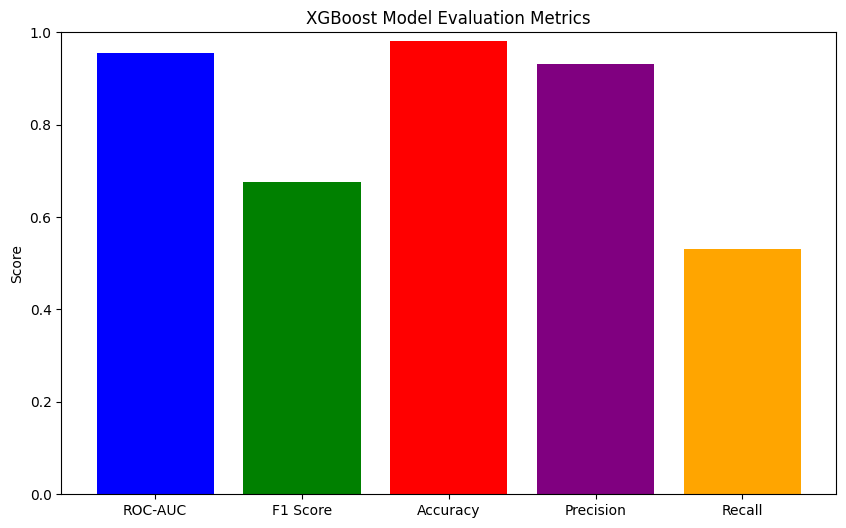

In [6]:
metrics = {
    'ROC-AUC': roc_auc,
    'F1 Score': f1,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
}

metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Score')
plt.title('XGBoost Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()